## WeGo Data Introduction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import geopandas as gpd
from shapely import wkt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from matplotlib.ticker import MaxNLocator

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [5]:
wego.sort_values('HDWY_DEV', ascending=False).head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
269843,120230917,3,100025713,2023-09-17,23,2310,1927,350397,0,FROM DOWNTOWN,N1SP,3.0,0,36.175433,-86.774320,2023-09-17 18:01:00,2023-09-17 18:02:57,2023-09-17 18:02:57,-1.950000,25.0,590.433333,565.433333,0,0,1,0,0.0,0,0.0,NaN
270201,120230917,3,100026077,2023-09-17,23,2313,2669,350602,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-09-17 17:06:00,2023-09-17 17:07:10,2023-09-17 17:07:10,-1.166666,25.0,568.833333,543.833333,0,0,1,0,1.0,0,0.0,NaN
187826,120230902,2,100388181,2023-09-02,23,2311,2221,350443,0,FROM DOWNTOWN,N1SP,3.0,0,36.175433,-86.774320,2023-09-02 16:46:00,2023-09-02 16:49:34,2023-09-02 16:49:34,-3.566666,25.0,554.550000,529.550000,0,0,1,0,0.0,0,0.0,NaN
53214,120230810,1,99715957,2023-08-10,22,2200,611,349957,0,FROM DOWNTOWN,ELIZ,10.0,0,36.195013,-86.837902,2023-08-10 16:44:00,2023-08-10 16:51:49,2023-08-10 16:51:49,-7.816666,50.0,558.700000,508.700000,0,1,0,0,0.0,0,0.0,NaN
326698,120230927,1,100312968,2023-09-27,22,2200,2809,349957,0,FROM DOWNTOWN,ELIZ,10.0,0,36.195013,-86.837902,2023-09-27 16:44:00,2023-09-27 16:52:01,2023-09-27 16:52:01,-8.016666,50.0,555.233333,505.233333,0,1,0,0,0.0,0,0.0,NaN


In [6]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [7]:
wego.shape

(350329, 30)

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [8]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [9]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [10]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [11]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [12]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [13]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [14]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [15]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


## 1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

In [16]:
wego.sort_values('ADHERENCE').head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
103162,120230818,1,99963004,2023-08-18,52,5202,1052,352052,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-08-18 06:15:00,2023-08-18 06:07:02,2023-08-18 22:03:32,-948.533333,15.0,30.583333,15.583333,0,1,0,0,0.0,0,956.5,8.0
19788,120230804,1,99559760,2023-08-04,22,2211,1743,350239,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-04 07:00:00,2023-08-04 06:48:12,2023-08-04 18:15:00,-675.000000,15.0,8.233333,-6.766667,0,1,0,0,0.0,0,686.8,5.0


In [17]:
wego['ADHERENCE'].describe()

count    338861.000000
mean         -3.188796
std           6.898842
min        -948.533333
25%          -4.566666
50%          -2.000000
75%          -0.333333
max          88.383333
Name: ADHERENCE, dtype: float64

In [18]:
wego[wego['TIME_POINT_ABBR'] == 'ARTS']['ROUTE_ABBR'].value_counts()

ROUTE_ABBR
55    109
Name: count, dtype: int64

In [19]:
### removing Adherence values over 60 either way. "Outliers"
wego_trim = wego[(wego['ADHERENCE'] >= -60) & (wego['ADHERENCE'] <= 60)] 

### removing Previous cancelled stops. Headway Outliers.
wego_trim = wego_trim[wego_trim['PREV_SCHED_STOP_CANCELLED'] != 1.0]

### dropping NAN values from ADHERENCE and Headway
wego_trim = wego_trim.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY'])

### dropping zeros from scheduled headway to avoid infs
wego_trim = wego_trim[wego_trim['SCHEDULED_HDWY']!=0]

### creating HDWY DEV %
wego_trim['HDWY_DEV_%'] = (wego_trim['ACTUAL_HDWY'] / wego_trim['SCHEDULED_HDWY'] * 100).round(2)

### removing cancelled stops
wego_trim = wego_trim[wego_trim['SCHEDULED_HDWY']!=1]

### Cleaning up outliers for HDWY_DEV_%
wego_trim = wego_trim[wego_trim['HDWY_DEV_%'] < 1000]

In [20]:
wego_trim

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_%
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,107.62
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,105.62
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,96.78
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,85.56
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,74.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,122.39
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,116.39
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,117.56
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,106.22


In [21]:
wego_trim['SCHEDULED_HDWY'].unique()

array([ 35.,  15.,  60.,  63.,  16.,  55.,  12.,  50.,  13.,  49.,  25.,
        24.,  30.,  68.,  33.,  28.,  23.,  45.,  46.,  10., 503.,  80.,
        65.,  59.,  32.,  22.,  20.,  21.,  11.,  31.,  19.,  17.,  48.,
        36.,  39.,  38.,  40.,  42.,  14.,  29.,  44.,  41.,  18.,  61.,
       100.,   9.,   8.,  43.,   7.,  26.,  34.,  37.,  53.,  51.,  57.,
       407.,   5.,  27.,  84.,  70.,  64.,  99.,  52.,  62.,  90.,   2.,
         6.,  58.])

In [22]:
wego_trim[wego_trim['HDWY_DEV_%'] > 1000]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_%


(array([3.70000e+01, 3.30000e+01, 4.80000e+01, 6.90000e+01, 1.15000e+02,
        1.64000e+02, 2.12000e+02, 3.43000e+02, 5.29000e+02, 9.26000e+02,
        1.85700e+03, 3.55200e+03, 7.35000e+03, 1.88010e+04, 6.05720e+04,
        1.46357e+05, 2.03300e+04, 4.02000e+02, 1.05000e+02, 4.80000e+01,
        3.00000e+01, 2.00000e+01, 5.00000e+00, 9.00000e+00, 6.00000e+00]),
 array([-59.816666  , -56.05066604, -52.28466608, -48.51866612,
        -44.75266616, -40.9866662 , -37.22066624, -33.45466628,
        -29.68866632, -25.92266636, -22.1566664 , -18.39066644,
        -14.62466648, -10.85866652,  -7.09266656,  -3.3266666 ,
          0.43933336,   4.20533332,   7.97133328,  11.73733324,
         15.5033332 ,  19.26933316,  23.03533312,  26.80133308,
         30.56733304,  34.333333  ]),
 <BarContainer object of 25 artists>)

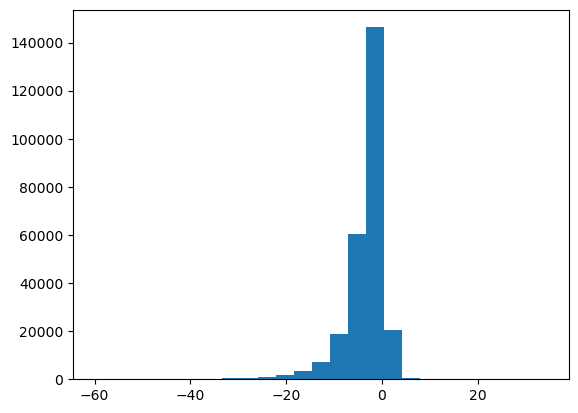

In [23]:
plt.hist(wego_trim['ADHERENCE'], bins=25)

Text(0, 0.5, 'ACTUAL_HDWY')

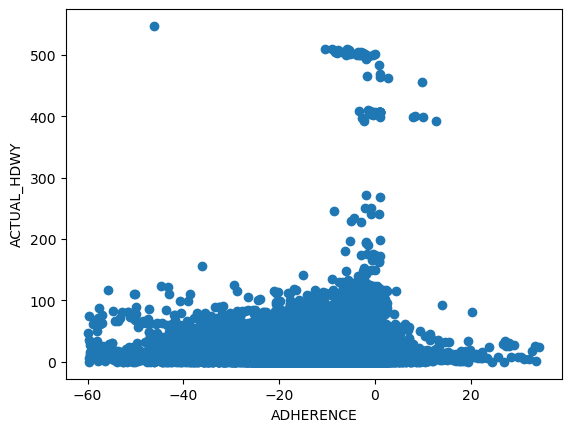

In [24]:
plt.scatter(wego_trim['ADHERENCE'],wego_trim['ACTUAL_HDWY'])
plt.xlabel('ADHERENCE')
plt.ylabel('ACTUAL_HDWY')

In [25]:
wego_trim.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_%
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,107.62
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,105.62
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,96.78
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,85.56
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,74.11


In [26]:
## removing endpoints for calucating early stops (early is disregarded for the last stop)
no_ends = wego_trim[wego_trim['TRIP_EDGE'] < 2] 

In [27]:
ontime = wego_trim['ADJUSTED_ONTIME_COUNT'].sum()

early = no_ends['ADJUSTED_EARLY_COUNT'].sum()

late = wego_trim['ADJUSTED_LATE_COUNT'].sum()

ontime/(early+late+ontime)*100

79.61591325595602

In [28]:
late/(early+late+ontime)*100

17.076588271227855

In [29]:
early/(early+late+ontime)*100

3.307498472816127

### 79.77% On time
### 17.35% Late
### 2.88% Early

#### ---------------------------------------------------
## 2. How does direction of travel, route, or location affect the headway and on-time performance?

In [30]:
# wego_trim['HDWY_DEV_%'] = (wego_trim['ACTUAL_HDWY'] / wego_trim['SCHEDULED_HDWY'] * 100).round(2)

In [31]:
wego_trim.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_%
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,107.62
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,105.62


In [32]:
direction = wego_trim.groupby('ROUTE_DIRECTION_NAME').agg({'ADJUSTED_ONTIME_COUNT': 'sum','ADJUSTED_EARLY_COUNT': 'sum','ADJUSTED_LATE_COUNT': 'sum'})

In [33]:
direction = direction.rename(columns = {'ADJUSTED_ONTIME_COUNT':'on_time_total',
                      'ADJUSTED_EARLY_COUNT':'early_total',
                      'ADJUSTED_LATE_COUNT':'late_total'})
direction = direction.reset_index()

In [34]:
direction['on_time_%'] = direction['on_time_total'] / (direction['on_time_total']+direction['early_total']+direction['late_total'])*100
direction

,ROUTE_DIRECTION_NAME,on_time_total,early_total,late_total,on_time_%
0,FROM DOWNTOWN,104940,4442,30214,75.174074
1,TO DOWNTOWN,103590,4221,14513,84.684935


In [35]:
wego_trim.groupby('ROUTE_DIRECTION_NAME').agg({'HDWY_DEV_%': ['min','max','mean']})

HDWY_DEV_%                    
                            min     max        mean
ROUTE_DIRECTION_NAME                               
FROM DOWNTOWN               0.0  980.00  102.781337
TO DOWNTOWN                 0.0  896.61  102.130863

In [36]:
wego_trim.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_%
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,107.62
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,105.62


## Let's make a map!

In [37]:
###import zipcodes json file
zipcodes = gpd.read_file('../data/zipcodes.geojson')

In [38]:
### convert dataframe to geodataframe
wego_geo = gpd.GeoDataFrame(wego_trim, 
                           crs = zipcodes.crs, 
                           geometry = gpd.points_from_xy(wego_trim['LONGITUDE'], wego_trim['LATITUDE']))

In [39]:
### join geodataframes
wego_geo = gpd.sjoin(wego_geo, zipcodes, predicate = 'within')
wego_geo.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_%,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,107.62,POINT (-86.84771 36.18125),27,37218,55,NASHVILLE,253501.29953687743,1071962039.8548584
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,105.62,POINT (-86.83998 36.19345),27,37218,55,NASHVILLE,253501.29953687743,1071962039.8548584
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,96.78,POINT (-86.81445 36.18218),40,37208,37,NASHVILLE,70573.704871160182,127811448.66113281
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,85.56,POINT (-86.78192 36.16709),24,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,74.11,POINT (-86.81422 36.18348),40,37208,37,NASHVILLE,70573.704871160182,127811448.66113281


In [40]:
type(wego_geo)

geopandas.geodataframe.GeoDataFrame

In [41]:
hdwy_zip = wego_geo.groupby('zip').agg({'HDWY_DEV_%':'mean'})

In [42]:
zipcodes

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
5,37143,23,PEGRAM,7047.8267580476522,1900364.756652832,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
6,37080,42,JOELTON,2319.8074237329579,56522.611450195313,"MULTIPOLYGON (((-86.86263 36.37811, -86.86264 ..."
7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ..."
8,37072,47,GOODLETTSVILLE,225242.45424953851,1094968706.7701416,"MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ..."
9,37212,54,NASHVILLE,58759.243654332378,73920091.147705078,"MULTIPOLYGON (((-86.80790 36.14643, -86.80605 ..."


In [43]:
hdwy_zip = hdwy_zip.rename(columns = {'zip':'zipcode',
                          'ACTUAL_HDWY': 'average_headway'}).reset_index()

In [44]:
hdwy_zip.head(2)

,zip,HDWY_DEV_%
0,37013,102.048911
1,37072,101.293971


In [45]:
hdwy_zip = hdwy_zip.rename(columns = {'zip':'zipcode'})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, '37013'),
  Text(1, 0, '37072'),
  Text(2, 0, '37115'),
  Text(3, 0, '37203'),
  Text(4, 0, '37205'),
  Text(5, 0, '37206'),
  Text(6, 0, '37207'),
  Text(7, 0, '37208'),
  Text(8, 0, '37209'),
  Text(9, 0, '37210'),
  Text(10, 0, '37211'),
  Text(11, 0, '37212'),
  Text(12, 0, '37213'),
  Text(13, 0, '37215'),
  Text(14, 0, '37216'),
  Text(15, 0, '37217'),
  Text(16, 0, '37218'),
  Text(17, 0, '37219'),
  Text(18, 0, '37221'),
  Text(19, 0, '37240')])

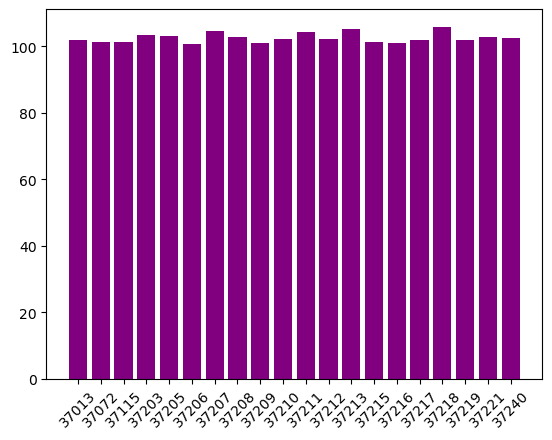

In [46]:
plt.bar(hdwy_zip['zipcode'],hdwy_zip['HDWY_DEV_%'], color='purple')
plt.xticks(rotation=45)

C:\Users\MattM\AppData\Local\Temp\ipykernel_26728\3748644790.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


[Text(0.5, 0, 'Zipcodes'),
 Text(0, 0.5, 'Average Headway'),
 Text(0.5, 1.0, 'Average Headway by Zipcode')]

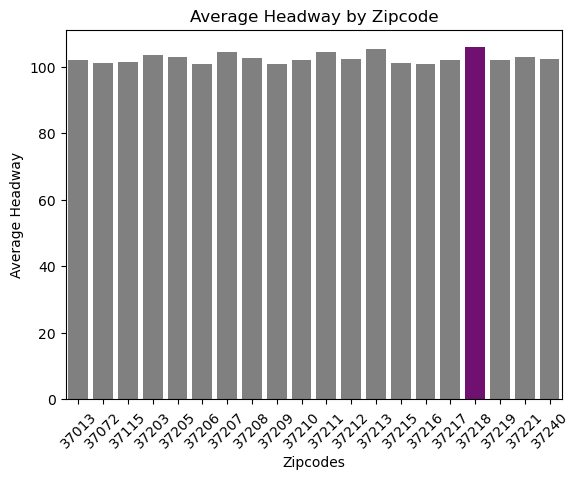

In [47]:
cols = ['grey' if (x < max(hdwy_zip['HDWY_DEV_%'])) else 'purple' for x in hdwy_zip['HDWY_DEV_%']]

bars = sns.barplot(
    data= hdwy_zip,
    x= 'zipcode',
    y= 'HDWY_DEV_%',
    palette=cols)
plt.xticks(rotation=45)
bars.set(xlabel='Zipcodes', ylabel='Average Headway',title='Average Headway by Zipcode')

In [48]:
adh_zip = wego_geo.groupby('zip').agg({'ADHERENCE':'mean'})

In [49]:
adh_zip

,ADHERENCE
zip,
37013,-2.701743
37072,-1.667032
37115,-3.484780
37203,-4.320056
37205,-3.969833
37206,-2.920542
37207,-2.322391
37208,-1.829317
37209,-2.819674


In [50]:
wego_stops = wego_geo.groupby('TIME_POINT_ABBR').agg({'HDWY_DEV_%':'mean', 'ADHERENCE':'mean'}).reset_index()
wego_stops.head(2)

,TIME_POINT_ABBR,HDWY_DEV_%,ADHERENCE
0,21BK,102.269583,-4.378003
1,25ACLARK,101.986244,-0.403602


In [51]:
wego_stops = wego_stops.rename(columns={'TIME_POINT_ABBR' : 'Location',
                                       'HDWY_DEV_%' : 'AVG_HWY_DEVIATION',
                                       'ADHERENCE' : 'AVG_ADHERENCE'})

In [52]:
wego_stops

,Location,AVG_HWY_DEVIATION,AVG_ADHERENCE
0,21BK,102.269583,-4.378003
1,25ACLARK,101.986244,-0.403602
2,28&CHARL,100.794200,-2.827421
3,BRCJ,103.577190,-3.795209
4,CH46,100.858752,-2.828775
5,CLFF,114.092152,-2.494915
6,CV23,102.910102,-2.050816
7,DCSCC,140.611931,-7.154590
8,DKTL,104.656652,-1.873153
9,DWMRT,102.724108,-2.120696


In [53]:
wego_stops.shape

(48, 3)

In [54]:
wego_group = wego_geo.groupby(['TIME_POINT_ABBR'])
wego_group.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_%,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,107.62,POINT (-86.84771 36.18125),27,37218,55,NASHVILLE,253501.29953687743,1071962039.8548584
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,105.62,POINT (-86.83998 36.19345),27,37218,55,NASHVILLE,253501.29953687743,1071962039.8548584
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,96.78,POINT (-86.81445 36.18218),40,37208,37,NASHVILLE,70573.704871160182,127811448.66113281
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,85.56,POINT (-86.78192 36.16709),24,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,74.11,POINT (-86.81422 36.18348),40,37208,37,NASHVILLE,70573.704871160182,127811448.66113281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46641,120230808,1,99658006,2023-08-08,50,9950,2497,354098,0,TO DOWNTOWN,MLKS,10.0,1,36.161197,-86.800180,2023-08-08 15:20:00,2023-08-08 14:34:33,2023-08-08 15:17:06,2.900000,10.0,0.483333,-9.516667,1,0,0,0,0.0,0,42.550000,NaN,4.83,POINT (-86.80018 36.16120),35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
53133,120230809,1,99691990,2023-08-09,50,9950,2497,354098,0,TO DOWNTOWN,MLKS,10.0,1,36.161197,-86.800180,2023-08-09 15:20:00,2023-08-09 15:19:53,2023-08-09 15:21:43,-1.716666,10.0,10.183333,0.183333,0,0,1,0,0.0,0,1.833333,NaN,101.83,POINT (-86.80018 36.16120),35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
59643,120230810,1,99725985,2023-08-10,50,9950,2530,354098,0,TO DOWNTOWN,MLKS,10.0,1,36.161197,-86.800180,2023-08-10 15:20:00,2023-08-10 15:15:53,2023-08-10 15:21:05,-1.083333,10.0,10.616666,0.616666,0,0,1,0,0.0,0,5.200000,NaN,106.17,POINT (-86.80018 36.16120),35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875
66133,120230811,1,99759949,2023-08-11,50,9950,2530,354098,0,TO DOWNTOWN,MLKS,10.0,1,36.161197,-86.800180,2023-08-11 15:20:00,2023-08-11 15:22:29,2023-08-11 15:22:29,-2.483333,10.0,12.083333,2.083333,0,0,1,0,0.0,0,0.000000,NaN,120.83,POINT (-86.80018 36.16120),35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875


In [55]:
wego_stops = pd.merge(wego_stops, wego_geo, left_on=  'Location',
                   right_on= 'TIME_POINT_ABBR', 
                   how = 'left')

In [56]:
wego_stops = wego_stops.drop_duplicates("Location")

In [57]:
wego_stops.head()

,Location,AVG_HWY_DEVIATION,AVG_ADHERENCE,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_%,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
0,21BK,102.269583,-4.378003,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 14:41:00,2023-08-01 14:46:54,2023-08-01 14:46:54,-5.900000,15.0,5.950000,-9.050000,0,0,1,0,0.0,0,0.000000,NaN,39.67,POINT (-86.80062 36.13837),9,37212,54,NASHVILLE,58759.243654332378,73920091.147705078
5710,25ACLARK,101.986244,-0.403602,120230801,1,99458217,2023-08-01,22,2210,2355,345379,0,TO DOWNTOWN,25ACLARK,6.0,1,36.186350,-86.816998,2023-08-01 07:06:00,2023-08-01 06:42:46,2023-08-01 07:08:02,-2.033333,30.0,30.850000,0.850000,0,0,1,0,0.0,0,25.266666,20.0,102.83,POINT (-86.81700 36.18635),40,37208,37,NASHVILLE,70573.704871160182,127811448.66113281
6839,28&CHARL,100.794200,-2.827421,120230801,1,99461158,2023-08-01,50,5000,1682,346806,0,TO DOWNTOWN,28&CHARL,13.0,0,36.153870,-86.818414,2023-08-01 06:24:00,2023-08-01 06:24:16,2023-08-01 06:24:16,-0.266666,15.0,12.800000,-2.200000,0,0,1,0,0.0,0,0.000000,NaN,85.33,POINT (-86.81841 36.15387),12,37209,10,NASHVILLE,310224.91345860378,1001364029.2892456
13701,BRCJ,103.577190,-3.795209,120230801,1,99459765,2023-08-01,3,300,1992,346077,0,FROM DOWNTOWN,BRCJ,7.0,0,36.069342,-86.933604,2023-08-02 00:57:00,2023-08-04 00:56:07,2023-08-03 00:59:40,-2.666666,100.0,99.183333,-0.816667,0,0,1,0,0.0,0,3.550000,NaN,99.18,POINT (-86.93360 36.06934),7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
17552,CH46,100.858752,-2.828775,120230801,1,99461157,2023-08-01,50,5000,1682,346806,0,TO DOWNTOWN,CH46,14.0,0,36.152077,-86.842746,2023-08-01 06:20:00,2023-08-01 06:21:31,2023-08-01 06:21:31,-1.516666,15.0,13.166666,-1.833334,0,0,1,0,0.0,0,0.000000,NaN,87.78,POINT (-86.84275 36.15208),12,37209,10,NASHVILLE,310224.91345860378,1001364029.2892456


In [58]:
wego_stops['AVG_ADHERENCE'] = wego_stops['AVG_ADHERENCE'].round(2)
wego_stops

,Location,AVG_HWY_DEVIATION,AVG_ADHERENCE,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_%,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
0,21BK,102.269583,-4.38,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 14:41:00,2023-08-01 14:46:54,2023-08-01 14:46:54,-5.900000,15.0,5.950000,-9.050000,0,0,1,0,0.0,0,0.000000,NaN,39.67,POINT (-86.80062 36.13837),9,37212,54,NASHVILLE,58759.243654332378,73920091.147705078
5710,25ACLARK,101.986244,-0.40,120230801,1,99458217,2023-08-01,22,2210,2355,345379,0,TO DOWNTOWN,25ACLARK,6.0,1,36.186350,-86.816998,2023-08-01 07:06:00,2023-08-01 06:42:46,2023-08-01 07:08:02,-2.033333,30.0,30.850000,0.850000,0,0,1,0,0.0,0,25.266666,20.0,102.83,POINT (-86.81700 36.18635),40,37208,37,NASHVILLE,70573.704871160182,127811448.66113281
6839,28&CHARL,100.794200,-2.83,120230801,1,99461158,2023-08-01,50,5000,1682,346806,0,TO DOWNTOWN,28&CHARL,13.0,0,36.153870,-86.818414,2023-08-01 06:24:00,2023-08-01 06:24:16,2023-08-01 06:24:16,-0.266666,15.0,12.800000,-2.200000,0,0,1,0,0.0,0,0.000000,NaN,85.33,POINT (-86.81841 36.15387),12,37209,10,NASHVILLE,310224.91345860378,1001364029.2892456
13701,BRCJ,103.577190,-3.80,120230801,1,99459765,2023-08-01,3,300,1992,346077,0,FROM DOWNTOWN,BRCJ,7.0,0,36.069342,-86.933604,2023-08-02 00:57:00,2023-08-04 00:56:07,2023-08-03 00:59:40,-2.666666,100.0,99.183333,-0.816667,0,0,1,0,0.0,0,3.550000,NaN,99.18,POINT (-86.93360 36.06934),7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
17552,CH46,100.858752,-2.83,120230801,1,99461157,2023-08-01,50,5000,1682,346806,0,TO DOWNTOWN,CH46,14.0,0,36.152077,-86.842746,2023-08-01 06:20:00,2023-08-01 06:21:31,2023-08-01 06:21:31,-1.516666,15.0,13.166666,-1.833334,0,0,1,0,0.0,0,0.000000,NaN,87.78,POINT (-86.84275 36.15208),12,37209,10,NASHVILLE,310224.91345860378,1001364029.2892456
24405,CLFF,114.092152,-2.49,120230801,1,99457972,2023-08-01,22,2200,2689,345128,0,FROM DOWNTOWN,CLFF,9.0,0,36.192856,-86.828554,2023-08-01 17:56:00,2023-08-01 18:00:06,2023-08-01 18:00:06,-4.100000,49.0,44.633333,-4.366667,0,0,1,0,0.0,0,0.000000,NaN,91.09,POINT (-86.82855 36.19286),27,37218,55,NASHVILLE,253501.29953687743,1071962039.8548584
25562,CV23,102.910102,-2.05,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,96.78,POINT (-86.81445 36.18218),40,37208,37,NASHVILLE,70573.704871160182,127811448.66113281
32829,DCSCC,140.611931,-7.15,120230801,1,99462397,2023-08-01,52,5211,2062,347338,0,TO DOWNTOWN,DCSCC,8.0,1,36.086817,-86.686874,2023-08-01 05:37:00,2023-08-01 05:39:35,2023-08-01 05:39:35,-2.583333,25.0,32.550000,7.550000,0,0,1,0,0.0,0,0.000000,NaN,130.20,POINT (-86.68687 36.08682),49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
34372,DKTL,104.656652,-1.87,120230801,1,99458395,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,DKTL,4.0,0,36.204256,-86.769112,2023-08-01 05:39:00,2023-08-01 05:41:16,2023-08-01 05:41:16,-2.266666,22.0,22.966666,0.966666,0,0,1,0,0.0,0,0.000000,NaN,104.39,POINT (-86.76911 36.20426),42,37207,48,NASHVILLE,196775.60104082408,556772811.32653809
42109,DWMRT,102.724108,-2.12,120230801,1,99458391,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,DWMRT,5.0,1,36.244060,-86.757403,2023-08-01 05:00:00,2023-08-01 04:50:15,2023-08-01 05:03:14,-3.233333,15.0,17.950000,2.950000,0,0,1,0,0.0,0,12.983333,NaN,119.67,POINT (-86.75740 36.24406),42,37207,48,NASHVILLE,196775.60104082408,556772811.32653809


In [59]:
def getcolor(wego_stops):    
    if wego_stops['HDWY_DEV_%'] > 150:
        c = 'red'
    elif wego_stops['HDWY_DEV_%'] < 50:
        c= 'red'
    else:
        if wego_stops['AVG_ADHERENCE'] < -6:
            c = 'red'
        elif wego_stops['AVG_ADHERENCE'] > 1:
            c = 'red'
        else:
            c = 'green'
    return c

    

In [60]:
wego_stops

,Location,AVG_HWY_DEVIATION,AVG_ADHERENCE,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_%,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
0,21BK,102.269583,-4.38,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 14:41:00,2023-08-01 14:46:54,2023-08-01 14:46:54,-5.900000,15.0,5.950000,-9.050000,0,0,1,0,0.0,0,0.000000,NaN,39.67,POINT (-86.80062 36.13837),9,37212,54,NASHVILLE,58759.243654332378,73920091.147705078
5710,25ACLARK,101.986244,-0.40,120230801,1,99458217,2023-08-01,22,2210,2355,345379,0,TO DOWNTOWN,25ACLARK,6.0,1,36.186350,-86.816998,2023-08-01 07:06:00,2023-08-01 06:42:46,2023-08-01 07:08:02,-2.033333,30.0,30.850000,0.850000,0,0,1,0,0.0,0,25.266666,20.0,102.83,POINT (-86.81700 36.18635),40,37208,37,NASHVILLE,70573.704871160182,127811448.66113281
6839,28&CHARL,100.794200,-2.83,120230801,1,99461158,2023-08-01,50,5000,1682,346806,0,TO DOWNTOWN,28&CHARL,13.0,0,36.153870,-86.818414,2023-08-01 06:24:00,2023-08-01 06:24:16,2023-08-01 06:24:16,-0.266666,15.0,12.800000,-2.200000,0,0,1,0,0.0,0,0.000000,NaN,85.33,POINT (-86.81841 36.15387),12,37209,10,NASHVILLE,310224.91345860378,1001364029.2892456
13701,BRCJ,103.577190,-3.80,120230801,1,99459765,2023-08-01,3,300,1992,346077,0,FROM DOWNTOWN,BRCJ,7.0,0,36.069342,-86.933604,2023-08-02 00:57:00,2023-08-04 00:56:07,2023-08-03 00:59:40,-2.666666,100.0,99.183333,-0.816667,0,0,1,0,0.0,0,3.550000,NaN,99.18,POINT (-86.93360 36.06934),7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319
17552,CH46,100.858752,-2.83,120230801,1,99461157,2023-08-01,50,5000,1682,346806,0,TO DOWNTOWN,CH46,14.0,0,36.152077,-86.842746,2023-08-01 06:20:00,2023-08-01 06:21:31,2023-08-01 06:21:31,-1.516666,15.0,13.166666,-1.833334,0,0,1,0,0.0,0,0.000000,NaN,87.78,POINT (-86.84275 36.15208),12,37209,10,NASHVILLE,310224.91345860378,1001364029.2892456
24405,CLFF,114.092152,-2.49,120230801,1,99457972,2023-08-01,22,2200,2689,345128,0,FROM DOWNTOWN,CLFF,9.0,0,36.192856,-86.828554,2023-08-01 17:56:00,2023-08-01 18:00:06,2023-08-01 18:00:06,-4.100000,49.0,44.633333,-4.366667,0,0,1,0,0.0,0,0.000000,NaN,91.09,POINT (-86.82855 36.19286),27,37218,55,NASHVILLE,253501.29953687743,1071962039.8548584
25562,CV23,102.910102,-2.05,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,96.78,POINT (-86.81445 36.18218),40,37208,37,NASHVILLE,70573.704871160182,127811448.66113281
32829,DCSCC,140.611931,-7.15,120230801,1,99462397,2023-08-01,52,5211,2062,347338,0,TO DOWNTOWN,DCSCC,8.0,1,36.086817,-86.686874,2023-08-01 05:37:00,2023-08-01 05:39:35,2023-08-01 05:39:35,-2.583333,25.0,32.550000,7.550000,0,0,1,0,0.0,0,0.000000,NaN,130.20,POINT (-86.68687 36.08682),49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
34372,DKTL,104.656652,-1.87,120230801,1,99458395,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,DKTL,4.0,0,36.204256,-86.769112,2023-08-01 05:39:00,2023-08-01 05:41:16,2023-08-01 05:41:16,-2.266666,22.0,22.966666,0.966666,0,0,1,0,0.0,0,0.000000,NaN,104.39,POINT (-86.76911 36.20426),42,37207,48,NASHVILLE,196775.60104082408,556772811.32653809
42109,DWMRT,102.724108,-2.12,120230801,1,99458391,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,DWMRT,5.0,1,36.244060,-86.757403,2023-08-01 05:00:00,2023-08-01 04:50:15,2023-08-01 05:03:14,-3.233333,15.0,17.950000,2.950000,0,0,1,0,0.0,0,12.983333,NaN,119.67,POINT (-86.75740 36.24406),42,37207,48,NASHVILLE,196775.60104082408,556772811.32653809


In [61]:
wego_stops['color'] = wego_stops.apply(getcolor, axis=1)

In [126]:
bus_stops_map = folium.Map(location=[36.148385041463946, -86.77666862070282], zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(bus_stops_map)

# folium.GeoJson(zipcodes).add_to(bus_stops_map)

# inside the loop add each marker to the cluster
for row_index, row_values in wego_stops.iterrows():
    loc = [row_values['LATITUDE'], row_values['LONGITUDE']]
    pop = str('<b>Location: </b><br>'+ row_values['Location'] + '<br>' + '<b>HDWY_Deviation %: </b><br>' + str(row_values['HDWY_DEV_%']) + '<br>' + '<b>Average Adherence: </b><br>' + " " + str(row_values['AVG_ADHERENCE']))
    icon=folium.Icon(color=row_values['color'],icon="bus", prefix='fa',)
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)
    
bus_stops_map

bus_stops_map.save('bus_stops_map.html')

NameError: name 'bus_stops_map_free' is not defined

In [63]:
bus_stops_map

In [64]:
wego_trim.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_%
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,107.62
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,105.62
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,96.78
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,85.56
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,74.11


## 3. How does time of day or day of week affect headway and on-time performance?

#### looking at time of day

In [65]:
wego_trim[wego_trim['HDWY_DEV_%'] > 250]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_%
224,120230801,1,99458118,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,CLFF,9.0,1,36.192856,-86.828554,2023-08-01 09:45:00,2023-08-01 09:37:14,2023-08-01 09:49:58,-4.966666,45.0,229.833333,184.833333,0,0,1,0,0.0,0,12.733333,NaN,510.74
225,120230801,1,99458119,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,HPKL,8.0,0,36.218706,-86.834137,2023-08-01 09:55:00,2023-08-01 09:57:50,2023-08-01 09:57:50,-2.833333,45.0,227.216666,182.216666,0,0,1,0,0.0,0,0.000000,NaN,504.93
1591,120230801,1,99459950,2023-08-01,3,303,326,346217,0,FROM DOWNTOWN,WE23,3.0,0,36.149007,-86.804449,2023-08-01 16:50:00,2023-08-01 17:13:45,2023-08-01 17:13:45,-23.750000,10.0,25.666666,15.666666,0,1,0,0,0.0,0,0.000000,NaN,256.67
1592,120230801,1,99459951,2023-08-01,3,303,326,346217,0,FROM DOWNTOWN,WE31,4.0,0,36.143040,-86.815175,2023-08-01 16:54:00,2023-08-01 17:16:37,2023-08-01 17:19:37,-25.616666,10.0,26.666666,16.666666,0,1,0,0,0.0,0,3.000000,NaN,266.67
2058,120230801,1,99460437,2023-08-01,3,317,517,346398,0,FROM DOWNTOWN,WE23,3.0,0,36.149007,-86.804449,2023-08-01 16:40:00,2023-08-01 16:48:05,2023-08-01 16:48:05,-8.083333,10.0,26.766666,16.766666,0,1,0,0,0.0,0,0.000000,NaN,267.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348678,120230930,2,100404728,2023-09-30,52,5212,3101,352232,0,FROM DOWNTOWN,DCSCC,11.0,0,36.086817,-86.686874,2023-09-30 20:42:00,2023-09-30 20:49:23,2023-09-30 20:49:23,-7.383333,40.0,102.650000,62.650000,0,1,0,0,0.0,0,0.000000,NaN,256.62
348929,120230930,2,100404983,2023-09-30,55,5501,2138,352400,0,FROM DOWNTOWN,MXWHARF,6.0,0,36.148839,-86.762710,2023-09-30 23:01:00,2023-09-30 23:55:42,2023-09-30 23:55:42,-54.700000,30.0,83.000000,53.000000,0,1,0,0,0.0,0,0.000000,NaN,276.67
348930,120230930,2,100404984,2023-09-30,55,5501,2138,352400,0,FROM DOWNTOWN,MXTHOMP,8.0,0,36.128164,-86.713199,2023-09-30 23:13:00,2023-10-02 00:04:34,2023-10-01 00:04:34,-51.566666,30.0,81.566666,51.566666,0,1,0,0,0.0,0,0.000000,NaN,271.89
348931,120230930,2,100404985,2023-09-30,55,5501,2138,352400,0,FROM DOWNTOWN,MXDONEL,9.0,0,36.105615,-86.672004,2023-09-30 23:19:00,2023-10-02 00:10:35,2023-10-01 00:10:35,-51.583333,30.0,81.166666,51.166666,0,1,0,0,0.0,0,0.000000,NaN,270.56


In [66]:
wego_trim[wego_trim['HDWY_DEV_%'] > 200]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,HDWY_DEV_%
224,120230801,1,99458118,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,CLFF,9.0,1,36.192856,-86.828554,2023-08-01 09:45:00,2023-08-01 09:37:14,2023-08-01 09:49:58,-4.966666,45.0,229.833333,184.833333,0,0,1,0,0.0,0,12.733333,NaN,510.74
225,120230801,1,99458119,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,HPKL,8.0,0,36.218706,-86.834137,2023-08-01 09:55:00,2023-08-01 09:57:50,2023-08-01 09:57:50,-2.833333,45.0,227.216666,182.216666,0,0,1,0,0.0,0,0.000000,NaN,504.93
346,120230801,1,99458242,2023-08-01,22,2210,2125,345387,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 10:47:00,2023-08-01 10:49:39,2023-08-01 10:49:39,-2.650000,13.0,26.783333,13.783333,0,0,1,0,0.0,0,0.000000,NaN,206.03
348,120230801,1,99458244,2023-08-01,22,2210,2125,345388,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 11:13:00,2023-08-01 10:59:35,2023-08-01 11:17:59,-4.983333,13.0,27.333333,14.333333,0,0,1,0,0.0,0,18.400000,10.0,210.26
349,120230801,1,99458245,2023-08-01,22,2210,2125,345388,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 11:24:00,2023-08-01 11:29:06,2023-08-01 11:29:06,-5.100000,13.0,27.466666,14.466666,0,0,1,0,0.0,0,0.000000,NaN,211.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349362,120230930,2,100405426,2023-09-30,55,5506,2954,352630,0,FROM DOWNTOWN,MXTHOMP,8.0,0,36.128164,-86.713199,2023-09-30 14:10:00,2023-09-30 14:23:02,2023-09-30 14:23:02,-13.033333,15.0,30.366666,15.366666,0,1,0,0,0.0,0,0.000000,NaN,202.44
349363,120230930,2,100405427,2023-09-30,55,5506,2954,352630,0,FROM DOWNTOWN,MXDONEL,9.0,0,36.105615,-86.672004,2023-09-30 14:17:00,2023-09-30 14:33:55,2023-09-30 14:33:55,-16.916666,15.0,33.283333,18.283333,0,1,0,0,0.0,0,0.000000,NaN,221.89
349364,120230930,2,100405428,2023-09-30,55,5506,2954,352630,0,FROM DOWNTOWN,MXBELL,10.0,0,36.071990,-86.636496,2023-09-30 14:26:00,2023-09-30 14:43:24,2023-09-30 14:43:24,-17.400000,15.0,32.933333,17.933333,0,1,0,0,0.0,0,0.000000,NaN,219.56
349544,120230930,2,100405614,2023-09-30,56,5600,1593,352756,0,FROM DOWNTOWN,SAMS,12.0,0,36.307973,-86.685963,2023-09-30 14:43:00,2023-09-30 14:57:31,2023-09-30 15:02:27,-19.450000,20.0,41.450000,21.450000,0,1,0,0,0.0,0,4.933333,NaN,207.25


In [67]:
wego_trim = wego_trim[['ADHERENCE_ID','SCHEDULED_TIME','ADHERENCE','HDWY_DEV_%']]

In [68]:
wego_trim

,ADHERENCE_ID,SCHEDULED_TIME,ADHERENCE,HDWY_DEV_%
7,99457897,2023-08-01 05:42:00,-1.716666,107.62
8,99457898,2023-08-01 05:46:00,-1.916666,105.62
9,99457899,2023-08-01 05:54:00,-0.183333,96.78
11,99457901,2023-08-01 06:15:00,-1.316666,85.56
12,99457902,2023-08-01 06:25:00,1.500000,74.11
...,...,...,...,...
350320,100406606,2023-09-30 21:45:00,-5.900000,122.39
350323,100406609,2023-09-30 22:16:00,-8.616666,116.39
350324,100406610,2023-09-30 22:23:00,-8.433333,117.56
350326,100406612,2023-09-30 22:45:00,-4.316666,106.22


In [69]:
wego_trim['SCHEDULED_TIME'] = pd.to_datetime(wego_trim['SCHEDULED_TIME'])

C:\Users\MattM\AppData\Local\Temp\ipykernel_26728\1164442587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_trim['SCHEDULED_TIME'] = pd.to_datetime(wego_trim['SCHEDULED_TIME'])


In [70]:
wego_trim['hour'] = wego_trim['SCHEDULED_TIME'].dt.hour

C:\Users\MattM\AppData\Local\Temp\ipykernel_26728\954752123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_trim['hour'] = wego_trim['SCHEDULED_TIME'].dt.hour


In [71]:
wego_trim.hour.value_counts()

hour
16    17230
15    16910
7     16857
14    16334
8     16233
17    16225
9     16025
13    15973
12    15814
11    15796
10    15744
6     15257
18    13275
19    10594
20     9608
21     9336
22     8828
23     7027
5      5856
0      2740
4       251
1         7
Name: count, dtype: int64

In [72]:
def time_o_day(wego_trim):
    if wego_trim['hour'] in range(5,12):
        t = 'morning'
    elif wego_trim['hour'] in range(12,17):
        t = 'afternoon'
    elif wego_trim['hour'] in range(17,21):
        t = 'evening'
    else:
        t = 'night'
    return t

In [73]:
wego_trim['time_of_day'] = wego_trim.apply(time_o_day, axis=1)

C:\Users\MattM\AppData\Local\Temp\ipykernel_26728\3289665226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wego_trim['time_of_day'] = wego_trim.apply(time_o_day, axis=1)


In [74]:
wego_trim['HDWY_DEV_%'].sort_values()

119967      0.00
48668       0.00
245002      0.00
17998       0.00
277728      0.00
           ...  
213973    940.00
174761    960.64
82563     965.83
213974    968.33
163370    980.00
Name: HDWY_DEV_%, Length: 261920, dtype: float64

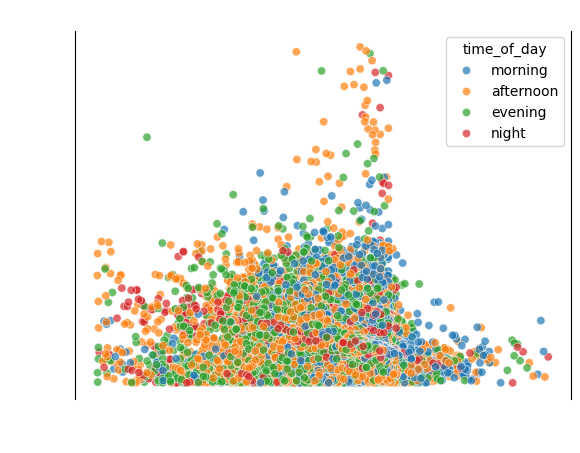

In [75]:
fig = sns.scatterplot(data=wego_trim, x="ADHERENCE", y="HDWY_DEV_%", hue="time_of_day", alpha = .7)
fig.set(xlabel='Adherence', ylabel='Headway Deviation %', title = 'Performance by Time of Day')

## setting borders and labels white
fig.spines['bottom'].set_color('white')
fig.spines['top'].set_color('white')
fig.xaxis.label.set_color('white')
fig.tick_params(axis='x', colors='white')
fig.yaxis.label.set_color('white')
fig.tick_params(axis='y', colors='white')
fig.title.set_color('white')

plt.ylabel('Headway Deviation Percentage')
plt.title('Peformance by Time of Day')
# sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
plt.savefig('Time_of_Day.png', transparent = True)

In [76]:
wego_trim.head()

,ADHERENCE_ID,SCHEDULED_TIME,ADHERENCE,HDWY_DEV_%,hour,time_of_day
7,99457897,2023-08-01 05:42:00,-1.716666,107.62,5,morning
8,99457898,2023-08-01 05:46:00,-1.916666,105.62,5,morning
9,99457899,2023-08-01 05:54:00,-0.183333,96.78,5,morning
11,99457901,2023-08-01 06:15:00,-1.316666,85.56,6,morning
12,99457902,2023-08-01 06:25:00,1.500000,74.11,6,morning


In [77]:
wego_trim[wego_trim['HDWY_DEV_%'] > 2000]

,ADHERENCE_ID,SCHEDULED_TIME,ADHERENCE,HDWY_DEV_%,hour,time_of_day


In [78]:
daytime = wego_trim.groupby('time_of_day').agg({'ADHERENCE':'mean','HDWY_DEV_%':'mean'}).reset_index()

In [79]:
daytime

,time_of_day,ADHERENCE,HDWY_DEV_%
0,afternoon,-3.649764,103.089091
1,evening,-4.242928,101.921059
2,morning,-2.830116,102.315314
3,night,-3.248647,102.259823


In [80]:
wego_trim.head()

,ADHERENCE_ID,SCHEDULED_TIME,ADHERENCE,HDWY_DEV_%,hour,time_of_day
7,99457897,2023-08-01 05:42:00,-1.716666,107.62,5,morning
8,99457898,2023-08-01 05:46:00,-1.916666,105.62,5,morning
9,99457899,2023-08-01 05:54:00,-0.183333,96.78,5,morning
11,99457901,2023-08-01 06:15:00,-1.316666,85.56,6,morning
12,99457902,2023-08-01 06:25:00,1.500000,74.11,6,morning


## 6. How much impact does being late or too spaced out at the first stop have downstream? 

In [81]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


#### create a unique ID combining CALENDAR_ID and TRIP_ID

In [82]:
wego['id'] = wego['CALENDAR_ID'].astype(str) + wego['TRIP_ID'].astype(str)

wego['HDWY_DEV_%'] = wego['ACTUAL_HDWY'] / wego['SCHEDULED_HDWY'] * 100

In [83]:
### removing Adherence values over 60 either way. "Outliers"
wego_trips = wego[(wego['ADHERENCE'] >= -60) & (wego['ADHERENCE'] <= 60)] 

### removing Previous cancelled stops. Headway Outliers.
wego_trips = wego_trips[wego_trips['PREV_SCHED_STOP_CANCELLED'] != 1.0]

### dropping NAN values from ADHERENCE and Headway
wego_trips = wego_trips.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY', 'ACTUAL_ARRIVAL_TIME'])

### dropping zeros from scheduled headway to avoid infs
wego_trips = wego_trips[wego_trips['SCHEDULED_HDWY']!=0]

### removing cancelled stops
wego_trips = wego_trips[wego_trips['STOP_CANCELLED']!=1]

In [84]:
wego_trips.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,id,HDWY_DEV_%
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,120230801345106,107.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,120230801345106,105.619046


In [85]:
### Determine trips that started late
late_start = wego_trips[(wego_trips['ADHERENCE'] < -6) & (wego_trips['TRIP_EDGE'] == 1)]

In [86]:
### bring back all stops of trips that started late
late = wego_trips[wego_trips['id'].isin(late_start['id'])]

In [87]:
late = late.groupby('id').agg({'ADJUSTED_ONTIME_COUNT': 'sum','ADJUSTED_EARLY_COUNT': 'sum','ADJUSTED_LATE_COUNT': 'sum'}).reset_index()

In [88]:
late['total_count'] = late['ADJUSTED_ONTIME_COUNT'] + late['ADJUSTED_EARLY_COUNT'] + late['ADJUSTED_LATE_COUNT']
late['late_%'] = late['ADJUSTED_LATE_COUNT'] / late['total_count'] * 100

In [89]:
late.head()

,id,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,total_count,late_%
0,120230801345131,0,0,2,2,100.000000
1,120230801345132,1,0,1,2,50.000000
2,120230801345230,1,0,1,2,50.000000
3,120230801345301,1,0,1,2,50.000000
4,120230801345305,2,0,1,3,33.333333


In [90]:
late_perc = (sum(late['ADJUSTED_LATE_COUNT']) / sum(late['total_count']) * 100)

In [91]:
late_perc

80.79239302694137

### Compare with on-time starts

In [92]:
ontime_start = wego_trips[(wego_trips['ADHERENCE'].between(-6,1)) & (wego_trips['TRIP_EDGE'] == 1)]

In [93]:
ontime = wego_trips[wego_trips['id'].isin(ontime_start['id'])]

In [94]:
ontime.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,id,HDWY_DEV_%
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,120230801345106,107.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,120230801345106,105.619046


In [95]:
(sum(ontime['ADJUSTED_LATE_COUNT']) / (sum(ontime['ADJUSTED_EARLY_COUNT'])+sum(ontime['ADJUSTED_LATE_COUNT'])+sum(ontime['ADJUSTED_ONTIME_COUNT'])))*100

9.629580835693739

### Trips that start late have an 80.74% chance to be late to future stops
### Trips that start on time have a 9.66% chance of being late to future stops.

In [96]:
### removing Adherence values over 60 either way. "Outliers"
wego_hdwy = wego[(wego['ADHERENCE'] >= -60) & (wego['ADHERENCE'] <= 60)] 

### removing Previous cancelled stops. Headway Outliers.
wego_hdwy = wego_hdwy[wego_hdwy['PREV_SCHED_STOP_CANCELLED'] != 1.0]

### dropping NAN values from ADHERENCE and Headway
wego_hdwy = wego_hdwy.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY'])

### dropping zeros from scheduled headway to avoid infs
wego_hdwy = wego_hdwy[wego_hdwy['SCHEDULED_HDWY']!=0]

### removing cancelled stops
wego_hdwy = wego_hdwy[wego_hdwy['STOP_CANCELLED']!=1]

In [97]:
### Determine trips that started with an unacceptably large headway
gap_start = wego_trips[(wego_trips['HDWY_DEV_%'] > 150) & (wego_trips['TRIP_EDGE'] == 1)]

In [98]:
### bring back all stops of trips that started with a gap
gapper = wego_trips[wego_trips['id'].isin(gap_start['id'])]

In [99]:
gapper.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,id,HDWY_DEV_%
224,120230801,1,99458118,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,CLFF,9.0,1,36.192856,-86.828554,2023-08-01 09:45:00,2023-08-01 09:37:14,2023-08-01 09:49:58,-4.966666,45.0,229.833333,184.833333,0,0,1,0,0.0,0,12.733333,NaN,120230801345297,510.740740
225,120230801,1,99458119,2023-08-01,22,2202,1190,345297,0,TO DOWNTOWN,HPKL,8.0,0,36.218706,-86.834137,2023-08-01 09:55:00,2023-08-01 09:57:50,2023-08-01 09:57:50,-2.833333,45.0,227.216666,182.216666,0,0,1,0,0.0,0,0.000000,NaN,120230801345297,504.925924


In [100]:
gap_stop_plot = gapper.groupby('ROUTE_STOP_SEQUENCE').agg({'HDWY_DEV_%':'mean'}).reset_index()
gap_stop_plot.head(2)

,ROUTE_STOP_SEQUENCE,HDWY_DEV_%
0,1.0,185.371744
1,2.0,203.138903


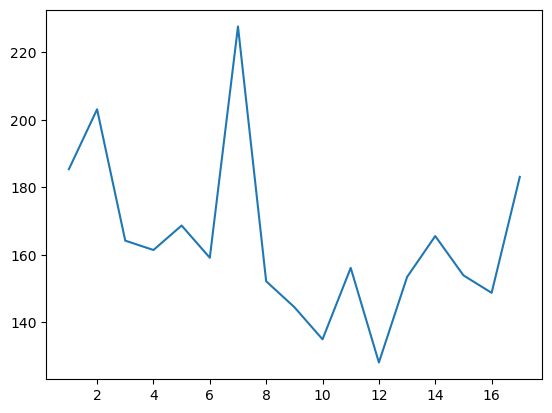

In [101]:
plt.plot(gap_stop_plot['ROUTE_STOP_SEQUENCE'], gap_stop_plot['HDWY_DEV_%'])

In [102]:
### Determine trips that started with an acceptable headway
nogap_start = wego_trips[(wego_trips['HDWY_DEV_%'].between (50,150)) & (wego_trips['TRIP_EDGE'] == 1)]

In [103]:
nogapper = wego_trips[wego_trips['id'].isin(nogap_start['id'])]

In [104]:
nogap_stop_plot = nogapper.groupby('ROUTE_STOP_SEQUENCE').agg({'HDWY_DEV_%':'mean'}).reset_index()
nogap_stop_plot.head(2)

,ROUTE_STOP_SEQUENCE,HDWY_DEV_%
0,1.0,100.209516
1,2.0,99.880207


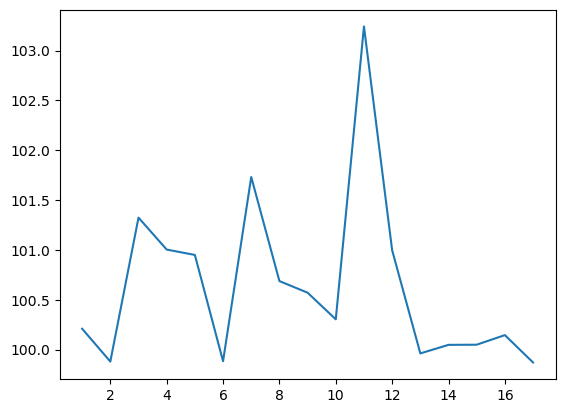

In [105]:
plt.plot(nogap_stop_plot['ROUTE_STOP_SEQUENCE'], nogap_stop_plot['HDWY_DEV_%'])

Text(0.5, 1.0, 'Headway Deviation by Stop Sequence')

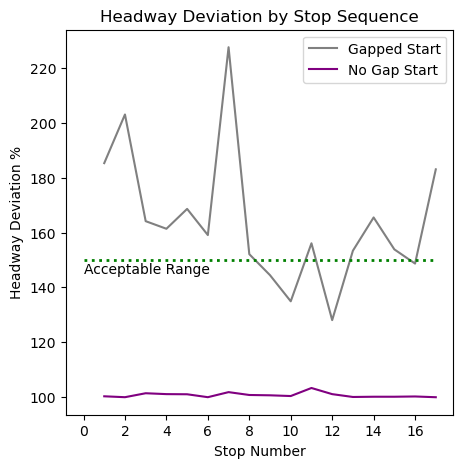

In [131]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.lineplot(data=gap_stop_plot, x='ROUTE_STOP_SEQUENCE', y='HDWY_DEV_%', label='Gapped Start', color = 'grey', ax=ax)
sns.lineplot(data=nogap_stop_plot, x='ROUTE_STOP_SEQUENCE', y='HDWY_DEV_%', label='No Gap Start', color = 'purple', ax=ax)
plt.plot([0, 17], [150, 150], linewidth=2, linestyle='dotted', color = 'green')
ax.text(0, 145, "Acceptable Range")

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Headway Deviation %')
plt.xlabel('Stop Number')
plt.title('Headway Deviation by Stop Sequence')

In [107]:
laters = wego_trips[wego_trips['id'].isin(late_start['id'])]

In [108]:
latestart_stop_plot = laters.groupby('ROUTE_STOP_SEQUENCE').agg({'ADHERENCE':'mean'}).reset_index()

In [109]:
ontime_stop_plot = ontime.groupby('ROUTE_STOP_SEQUENCE').agg({'ADHERENCE':'mean'}).reset_index()

In [110]:
ontime_stop_plot['ROUTE_STOP_SEQUENCE'] = ontime_stop_plot['ROUTE_STOP_SEQUENCE'].astype(int)
latestart_stop_plot['ROUTE_STOP_SEQUENCE'] = latestart_stop_plot['ROUTE_STOP_SEQUENCE'].astype(int)

Text(0.5, 1.0, 'Adherence by Stop Sequence')

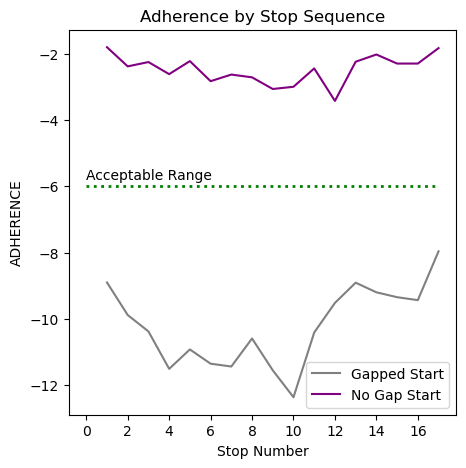

In [134]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.lineplot(data=latestart_stop_plot, x='ROUTE_STOP_SEQUENCE', y='ADHERENCE', label='Gapped Start', color = 'grey', ax=ax)
sns.lineplot(data=ontime_stop_plot, x='ROUTE_STOP_SEQUENCE', y='ADHERENCE', label='No Gap Start', color = 'purple', ax=ax)
plt.plot([0, 17], [-6, -6], linewidth=2, linestyle='dotted', color = 'green')
ax.text(0, -5.8, "Acceptable Range")

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Stop Number')
plt.title('Adherence by Stop Sequence')

In [112]:
ontime_stop_plot['ROUTE_STOP_SEQUENCE'].astype(int)

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
Name: ROUTE_STOP_SEQUENCE, dtype: int32

In [113]:
# ### removing Adherence values over 60 either way. "Outliers"
# wego_time = wego[(wego['ADHERENCE'] >= -60) & (wego['ADHERENCE'] <= 60)] 

# ### removing Previous cancelled stops. Headway Outliers.
# wego_time = wego[wego_hdwy['PREV_SCHED_STOP_CANCELLED'] != 1.0]

### dropping NAN values from ADHERENCE and Headway and arrival time
wego_time = wego.dropna(subset=['ADHERENCE','ACTUAL_HDWY','SCHEDULED_HDWY','ACTUAL_ARRIVAL_TIME'])

### dropping zeros from scheduled headway to avoid infs
wego_time = wego_time[wego_time['SCHEDULED_HDWY']!=0]

### removing cancelled stops
wego_time = wego_time[wego_time['STOP_CANCELLED']!=1]

In [114]:
wego_time

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,id,HDWY_DEV_%
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,120230801345106,107.619046
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,120230801345106,105.619046
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,120230801345106,96.777773
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,120230801345107,85.555553
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,120230801345107,74.111107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,120230930353447,122.388887
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,120230930353448,116.388887
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,120230930353448,117.555553
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,120230930353449,106.222220


In [115]:
wego_time['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wego_time['ACTUAL_ARRIVAL_TIME'])

In [116]:
wego_time = wego_time.groupby('id').agg({'ACTUAL_ARRIVAL_TIME': ['min','max'], 'HDWY_DEV_%':'mean'}).reset_index()

In [117]:
wego_time.columns=('trip_id', 'start_time', 'end_time', 'avg_hdwy_dev_perc')

In [118]:
wego_time.head(2)

,trip_id,start_time,end_time,avg_hdwy_dev_perc
0,120230801345106,2023-08-01 05:30:30,2023-08-01 05:54:11,103.338622
1,120230801345107,2023-08-01 06:05:31,2023-08-01 06:23:30,79.833330


In [119]:
wego_time['time_travelled'] = wego_time['end_time'] - wego_time['start_time']

In [120]:
wego_time['time_travelled_mins'] = wego_time['time_travelled'].dt.total_seconds().div(60).astype(int)

In [121]:
wego_time.sort_values('time_travelled_mins')

,trip_id,start_time,end_time,avg_hdwy_dev_perc,time_travelled,time_travelled_mins
39295,120230907350137,2023-09-07 15:01:43,2023-09-07 15:01:43,101.666667,0 days 00:00:00,0
9790,120230809353351,2023-08-09 09:36:17,2023-08-09 09:36:17,112.083330,0 days 00:00:00,0
57907,120230925349952,2023-09-25 13:24:47,2023-09-25 13:24:47,64.027775,0 days 00:00:00,0
26181,120230825350208,2023-08-25 06:10:02,2023-08-25 06:10:02,111.666667,0 days 00:00:00,0
57911,120230925349956,2023-09-25 16:01:41,2023-09-25 16:01:41,128.194442,0 days 00:00:00,0
...,...,...,...,...,...,...
64369,120230930352086,2023-09-30 23:11:16,2023-10-03 00:24:27,130.468253,2 days 01:13:11,2953
49514,120230916352086,2023-09-16 23:02:34,2023-09-19 00:18:08,127.861904,2 days 01:15:34,2955
35117,120230902352086,2023-09-02 23:04:41,2023-09-05 00:27:02,141.858729,2 days 01:22:21,2962
5192,120230805352086,2023-08-05 23:25:09,2023-08-08 01:00:55,190.550793,2 days 01:35:46,2975


In [122]:
wego[wego['id'] == '120230812352086']

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,id,HDWY_DEV_%
68330,120230812,2,99782313,2023-08-12,52,5202,2793,352086,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,2023-08-12 23:15:00,2023-08-12 23:09:23,2023-08-12 23:29:41,-14.683333,30.0,41.700000,11.700000,0,1,0,0,0.0,0,20.3,10.0,120230812352086,139.000000
68331,120230812,2,99782314,2023-08-12,52,5202,2793,352086,0,FROM DOWNTOWN,NVFG,3.0,0,36.135034,-86.759818,2023-08-12 23:35:00,2023-08-14 00:11:29,2023-08-13 00:11:29,-36.483333,30.0,65.100000,35.100000,0,1,0,0,0.0,0,0.0,NaN,120230812352086,217.000000
68332,120230812,2,99782315,2023-08-12,52,5202,2793,352086,0,FROM DOWNTOWN,THNV,4.0,0,36.111844,-86.745821,2023-08-12 23:40:00,2023-08-14 00:16:37,2023-08-13 00:16:37,-36.616666,30.0,65.850000,35.850000,0,1,0,0,0.0,0,0.0,NaN,120230812352086,219.500000
68333,120230812,2,99782316,2023-08-12,52,5202,2793,352086,0,FROM DOWNTOWN,WMRT,5.0,0,36.082309,-86.727340,2023-08-12 23:50:00,2023-08-14 00:23:56,2023-08-13 00:23:56,-33.933333,30.0,64.366666,34.366666,0,1,0,0,0.0,0,0.0,NaN,120230812352086,214.555553
68334,120230812,2,99782317,2023-08-12,52,5202,2793,352086,0,FROM DOWNTOWN,HCKP,9.0,0,36.048934,-86.713854,2023-08-12 23:58:00,2023-08-14 00:32:36,2023-08-13 00:32:36,-34.600000,NaN,297.483333,NaN,0,1,0,0,0.0,0,0.0,NaN,120230812352086,NaN
68335,120230812,2,99782318,2023-08-12,52,5202,2793,352086,0,FROM DOWNTOWN,LINWAL,10.0,0,36.083421,-86.703471,2023-08-13 00:11:00,2023-08-15 00:46:34,2023-08-14 00:46:34,-35.566666,42.0,79.233333,37.233333,0,1,0,0,0.0,0,0.0,NaN,120230812352086,188.650793
68336,120230812,2,99782319,2023-08-12,52,5202,2793,352086,0,FROM DOWNTOWN,DCSCC,11.0,2,36.086817,-86.686874,2023-08-13 00:16:00,2023-08-15 00:51:43,2023-08-14 00:51:43,-35.716666,NaN,NaN,NaN,0,1,0,0,NaN,0,0.0,NaN,120230812352086,NaN


In [123]:
### removing outliers?
wego_time = wego_time[wego_time['time_travelled_mins'] < 125]
wego_time = wego_time[wego_time['avg_hdwy_dev_perc'] < 300]

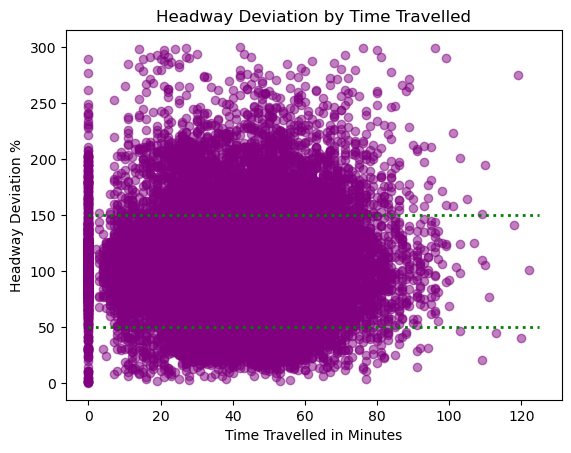

In [124]:
plt.scatter(wego_time['time_travelled_mins'], wego_time['avg_hdwy_dev_perc'], alpha = .5, color = 'purple')

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.ylabel('Headway Deviation %')
plt.xlabel('Time Travelled in Minutes')
plt.title('Headway Deviation by Time Travelled')

plt.plot([0, 125], [50, 50], linewidth=2, linestyle='dotted', color = 'green')
plt.plot([0, 125], [150, 150], linewidth=2, linestyle='dotted', color = 'green')

In [125]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,id,HDWY_DEV_%
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,120230801345104,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,120230801345104,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,120230801345104,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,120230801345104,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,120230801345105,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,120230930353448,117.555553
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN,120230930353448,NaN
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,120230930353449,106.222220
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN,120230930353449,158.333333
